1. train.csv / test.csv : 타이타닉 탑승자들 중 일부의 인적 정보와 생존 여부 데이터  
PassengerID : 탑승객 고유 아이디  
Survival : 탑승객 생존 유무 (0: 사망, 1: 생존)  
Pclass : 등실의 등급  
Name : 이름  
Sex : 성별  
Age : 나이  
Sibsp : 함께 탐승한 형제자매, 아내, 남편의 수  
Parch : 함께 탐승한 부모, 자식의 수  
Ticket :티켓 번호  
Fare : 티켓의 요금  
Cabin : 객실번호  
Embarked : 배에 탑승한 항구 이름 ( C = Cherbourn, Q = Queenstown, S = Southampton)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    print('Mac version')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    print('Windows version')
else:
    print('Unknown system... sorry~~~~')

Windows version


In [3]:
train = pd.read_csv("C:/Users/dudtj/OneDrive - 숭실대학교 - Soongsil University/Desktop/CL/python/ssuda 스터디/2. 타이타닉/train.csv")
test = pd.read_csv('C:/Users/dudtj/OneDrive - 숭실대학교 - Soongsil University/Desktop/CL/python/ssuda 스터디/2. 타이타닉/test.csv')
submission = pd.read_csv('C:/Users/dudtj/OneDrive - 숭실대학교 - Soongsil University/Desktop/CL/python/ssuda 스터디/2. 타이타닉/submission.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


train의 경우 Age(나이), Cabin(객실번호),Embarked(항구 이름)의 결측치가 존재한다.

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


test의 경우 또한 Age(나이), Cabin(객실번호),Fare(요금)의 결측치가 존재한다.

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# 나이는 필요없으므로 제거
train = train.drop(['Name'],axis=1)
test = test.drop(['Name'],axis=1)

In [8]:
train.groupby('Pclass')['Age'].mean()


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

PClass등급에 따른 나이 평균으로 나이 결측값을 대체.  
PClass 1일때, 38살  
PClass 2일때, 30살  
PClass 3일때, 25살

In [9]:
test.groupby('Pclass')['Age'].mean()

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [10]:
train['Age'] = train['Age'].fillna(train.groupby('Pclass')['Age'].transform('mean'))
test['Age'] = test['Age'].fillna(test.groupby('Pclass')['Age'].transform('mean'))

In [11]:
train = train.astype({'Age':'int'})
test = test.astype({'Age':'int'})

Sex의 경우 남자는 0, 여자는 1로 대체

In [12]:
# Sex를 수치형으로 변경
train['Sex']=train['Sex'].map({'male':0, 'female':1})
test['Sex']=test['Sex'].map({'male':0, 'female':1})

Embarked : 배에 탑승한 항구 이름 ( C = Cherbourn, Q = Queenstown, S = Southampton)

In [13]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

S가 최빈값으로 S로 대체

In [14]:
train['Embarked'].fillna(value='S', inplace=True)

In [15]:
test = test.dropna(subset = ['Fare'])
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Sex          417 non-null    int64  
 3   Age          417 non-null    int32  
 4   SibSp        417 non-null    int64  
 5   Parch        417 non-null    int64  
 6   Ticket       417 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     417 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(3)
memory usage: 34.2+ KB


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    int32  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    object 
dtypes: float64(1), int32(1), int64(6), object(3)
memory usage: 73.2+ KB


In [17]:
train = pd.get_dummies(columns=['Embarked'],data=train)
test = pd.get_dummies(columns=['Embarked'],data=test)

In [18]:
train = pd.get_dummies(columns=['Pclass'],data=train)
test = pd.get_dummies(columns=['Pclass'],data=test)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    int32  
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked_C   891 non-null    uint8  
 10  Embarked_Q   891 non-null    uint8  
 11  Embarked_S   891 non-null    uint8  
 12  Pclass_1     891 non-null    uint8  
 13  Pclass_2     891 non-null    uint8  
 14  Pclass_3     891 non-null    uint8  
dtypes: float64(1), int32(1), int64(5), object(2), uint8(6)
memory usage: 64.5+ KB


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Sex          417 non-null    int64  
 2   Age          417 non-null    int32  
 3   SibSp        417 non-null    int64  
 4   Parch        417 non-null    int64  
 5   Ticket       417 non-null    object 
 6   Fare         417 non-null    float64
 7   Cabin        91 non-null     object 
 8   Embarked_C   417 non-null    uint8  
 9   Embarked_Q   417 non-null    uint8  
 10  Embarked_S   417 non-null    uint8  
 11  Pclass_1     417 non-null    uint8  
 12  Pclass_2     417 non-null    uint8  
 13  Pclass_3     417 non-null    uint8  
dtypes: float64(1), int32(1), int64(4), object(2), uint8(6)
memory usage: 30.1+ KB


<AxesSubplot:>

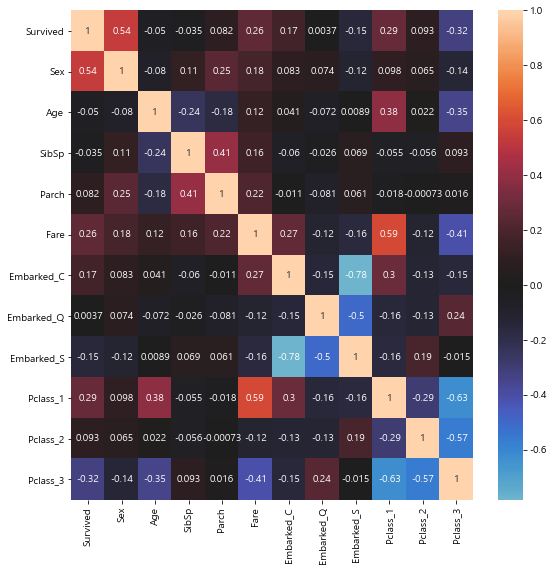

In [37]:
train_corr = train.corr()
plt.figure(figsize = (9,9))
sns.heatmap(train_corr, vmax=1, center=0, annot=True)

In [21]:
train.columns

Index(['PassengerId', 'Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1',
       'Pclass_2', 'Pclass_3'],
      dtype='object')

In [22]:
train = train.drop(['PassengerId','Cabin','Ticket'],axis=1)
test = test.drop(['Cabin','Ticket'],axis=1)

x와 y 분리

In [23]:
X_train = train.drop('Survived',axis=1)
y_train = train['Survived']

In [24]:
X_test = test.drop('PassengerId',axis=1)

In [25]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

In [26]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

0.9820426487093153

In [27]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
svc.score(X_train, y_train)

0.6812570145903479

In [28]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
knn.score(X_train, y_train)

0.8406285072951739

In [29]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
Y_pred = tree.predict(X_test)
tree.score(X_train, y_train)

0.9820426487093153

In [30]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
Y_pred = ada.predict(X_test)
ada.score(X_train, y_train)

0.8271604938271605

In [31]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
Y_pred = xgb.predict(X_test)
xgb.score(X_train, y_train)

[21:04:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9674523007856342

In [32]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
Y_pred = xgb.predict(X_test)
xgb.score(X_train, y_train)

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)

[21:04:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [33]:
import optuna
from optuna import Trial
from optuna.samplers import TPESampler
from sklearn.metrics import accuracy_score, precision_score,average_precision_score, recall_score, roc_auc_score # 평가

In [34]:
def objective(trial:Trial) -> float:
    max_depth = trial.suggest_int('max_depth', 1, 10)
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 2, 1000)
    n_estimators =  trial.suggest_int('n_estimators', 100, 500)
   
    rf = RandomForestClassifier(max_depth = max_depth, max_leaf_nodes = max_leaf_nodes,n_estimators = n_estimators,n_jobs=2,random_state=25)
    
    rf.fit(X_train, y_train)
    rf_pred = rf.predict_proba(X_test)[:,1]
    rf_score = roc_auc_score(test,rf_pred)
    return rf_score

In [35]:
sampler = TPESampler(seed=42)
study = optuna.create_study(
    study_name="rf_parameter_opt",
    direction="maximize",
    sampler=sampler,
)
study.optimize(objective, n_trials=10)
print("Best Score:", study.best_value)
print("Best trial:", study.best_trial.params)

[I 2022-02-20 21:04:15,324] A new study created in memory with name: rf_parameter_opt
[W 2022-02-20 21:04:16,295] Trial 0 failed because of the following error: ValueError('continuous-multioutput format is not supported')
Traceback (most recent call last):
  File "C:\Users\dudtj\anaconda3\lib\site-packages\optuna\study\_optimize.py", line 213, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-34-9291b922a0a5>", line 10, in objective
    rf_score = roc_auc_score(test,rf_pred)
  File "C:\Users\dudtj\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\dudtj\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py", line 547, in roc_auc_score
    return _average_binary_score(partial(_binary_roc_auc_score,
  File "C:\Users\dudtj\anaconda3\lib\site-packages\sklearn\metrics\_base.py", line 74, in _average_binary_score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: conti

ValueError: continuous-multioutput format is not supported